# Machine Learning in Health Care - Exercise 5

In the predictive maintenance lecture of the course you got to know two machine learning algorithms. Whereas you have implemented the neural network already, we will now focus on Support Vector Machines (SVM).

As a first part we will focus on the theory of SVMs. Afterwards, we'll be using SVMs to build a classifier that estimates if a surgery is successful or not. We will start with various 2-dimensional datasets to gain an intuition of how SVMs work.

## Task 1: Theory

Answer the following questions in a couple of sentences: <br>

**Question 1:**  What is the definition of support vector machines and their main goal? <br>
YF: SVM defines a hyperplane that maximises separation for classifcation.

**Question 2:**  What is a hyperplane for support vector machines? <br>
YF: A separation margin between the classes.

**Question 3:**  What is a support vector? <br>
YF: Support vector is the data used for training.

**Question 4:**  What is a kernel and what is the difference between the linear and the rbf kernel in Python for SVMs? <br>
YF: A kernel maps the support vector into higher dimensions if the data is not linearly separable. <br>
Linear kernel does not modify the data, while the RBF (radial basis function) ... ?


## Task 2: Surgery outcome classifier (SVM)

Before we go into depth of the machine learning algorithm and how it works, we must set up our workspace and import needed packages. Also, we can already define a function for plotting the graphs of our raw data.

In [1]:
# If you need to install packages, please use the following code
# Uncomment which packages you want to install and run the cell

# For matplotlib:
# ! pip install matplotlib
# For scikit learn: 
# ! pip install scikit-learn

In [2]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [3]:
def plot_raw_data(successful, complications):
    """
        Function which takes the two arguments of successful operations and operations with complications and plots the datapoints in a scatterplot.
        This is only for the raw data and columns have to be named X1, X2 and y.   
    """
    fig, ax = plt.subplots()
    ax.scatter(successful['X1'], successful['X2'], s=25, marker='o', color='b', label='Successful')
    ax.scatter(complications['X1'], complications['X2'], s=25, marker='x', color='r', label='Complications')
    ax.legend()
    plt.show()

### Linear decision boundary

Let's begin with a simple 2-dimensional dataset that contains two features and the outcome of the surgery (0 = successful, 1 = complications). The features correspond to the surgery duration and the patient age (normalized). Load the data in the beneath cell and turn it into a pandas-DataFrame (Data structure for tabular data: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) called ```data1```. Make sure the columns of the DataFrame are named **X1**, **X2** and **y**.

In [4]:
# Raw data given
X1 = [1.9643, 2.2753, 2.9781, 2.932, 3.5772, 4.015, 3.3814, 3.9113, 2.7822, 2.5518, 3.3698, 3.1048, 1.9182, 2.2638, 2.6555, 3.1855, 3.6579, 3.9113, 3.6002, 3.0357, 1.5841, 2.0103, 1.9527, 2.2753, 2.3099, 2.8283, 3.0473, 2.4827, 2.5057, 1.8721, 2.0103, 1.2269, 1.8951, 1.561, 1.5495, 1.6878, 1.4919, 0.962, 1.1693, 0.8122, 0.9735, 1.25, 1.3191, 2.2292, 2.4482, 2.7938, 2.091, 2.5403, 0.9044, 0.76615, 0.086405]
X2 = [4.5957, 3.8589, 4.5651, 3.5519, 2.856, 3.1937, 3.4291, 4.1761, 4.0431, 4.6162, 3.9101, 3.0709, 4.0534, 4.3706, 3.5008, 4.2888, 3.8692, 3.4291, 3.1221, 3.3165, 3.3575, 3.2039, 2.7843, 2.7127, 2.9584, 2.6309, 2.2931, 2.0373, 2.3853, 2.0577, 2.3546, 2.3239, 2.9174, 3.0709, 2.6923, 2.4057, 2.0271, 2.682, 2.9276, 2.9992, 3.3881, 3.1937, 3.5109, 2.201, 2.6411, 1.9656, 1.6177, 2.8867, 3.0198, 2.5899, 4.1045]
y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 

Please assign all successful samples to the variable ```successful``` and the others to ```complications```.

In [5]:
# Get X1, X2 and y into a DataFrame'
data_dict = {'X1': X1, 'X2': X2, 'y': y}
data1 = pd.DataFrame(data_dict)
data1

,X1,X2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


In [6]:
successful = data1.loc[data1['y'] == 0]
complications = data1.loc[data1['y'] == 1]
complications

,X1,X2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


Let's visualize the data as a scatter plot. Therefore use the already implemented method of ```plot_raw_data```. When calling the method, hand it over the two parameters successful and complications.

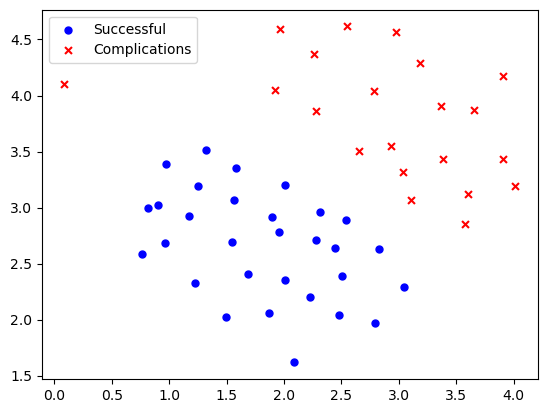

In [7]:
plot_raw_data(successful, complications)

The data seems to be well separated such that a linear boundary seems appropriate. However, notice that there is one outlier example that sits apart from the others (upper left). In the following, you will see how this outlier affects the SVM decision boundary.

To classify this dataset we will use a linear support vector classification. In python the method is called ```sklearn.svm.LinearSVC```. For this method we need to define some Hyperparamaters:
- C: A positive value that controls the penalty for misclassified training samples. A large C parameter tells the SVM to try to classify all the examples correctly. We will set it to the default of 1.0
- loss: We will use the hinge loss function. Further information can be found here under this link https://en.wikipedia.org/wiki/Hinge_loss#:~:text=In%20machine%20learning%2C%20the%20hinge,support%20vector%20machines%20(SVMs)


In [8]:
# Call the model and save it in variable svc1
svc1 = svm.LinearSVC(C=1.0)

Now, please train the SVM with our dataset data1. Note: Use svc1.fit().

In [9]:
X = data1[['X1','X2']]
y = data1['y']

In [10]:
svc1.fit(X,y)

C:\Users\yufan\anaconda3\envs\industry4\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

Next, evaluate the fit and print it out. Note: Use svc1.score().

In [11]:
svc1.score(X,y)

0.9803921568627451

So far, we have chosen C=1. So, let's now see how different values for C impact the performance. Please define the SVM called svc100 and choose C=100. Also train and evaluate the SVM. (Note: You might want to execute the code multiple times to achieve a better score)

In [12]:
# Define and save the model
svc100 = svm.LinearSVC(C=100)
# Fit the model to the data
svc100.fit(X,y)
# Evaluate the score of the model
svc100.score(X,y)

C:\Users\yufan\anaconda3\envs\industry4\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yufan\anaconda3\envs\industry4\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

Please create a scatter plot for data1 and svc1. Add the attributes ```cmap='seismic'``` and ```c = data['SVM1 Confidence']``` to the plot. 

In [13]:
# Calculate the confidence level with the python function: svc.decision_function
data1['SVM1 Confidence'] = svc1.decision_function(X)
data1['SVM1 Confidence']

0     0.829576
1     0.406272
2     1.261264
3     0.466502
4     0.224457
5     0.678971
6     0.574408
7     1.382961
8     0.774530
9     1.108950
10    0.936677
11    0.176591
12    0.394574
13    0.792040
14    0.303350
15    1.143271
16    1.034750
17    0.812265
18    0.438078
19    0.333208
20   -0.287050
21   -0.213089
22   -0.559512
23   -0.469408
24   -0.266166
25   -0.283676
26   -0.443447
27   -0.892307
28   -0.616116
29   -1.150802
30   -0.861941
31   -1.237042
32   -0.483681
33   -0.516377
34   -0.810784
35   -0.967663
36   -1.344841
37   -1.082365
38   -0.801679
39   -0.907270
40   -0.537753
41   -0.562159
42   -0.288806
43   -0.881031
44   -0.446499
45   -0.807441
46   -1.388698
47   -0.217523
48   -0.850146
49   -1.240639
50   -0.388627
Name: SVM1 Confidence, dtype: float64

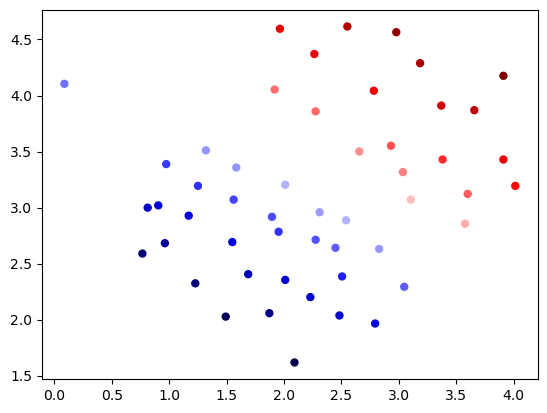

In [14]:
# Plot the data, use a new scatterplot for that and orient yourself on the code in the method plot_raw_data
plt.scatter(data1['X1'], data1['X2'], s=25, marker='o', cmap='seismic', c = data1['SVM1 Confidence'])
plt.show()

Now, plot the same plot for svc100.

ValueError: not enough values to unpack (expected 2, got 1)

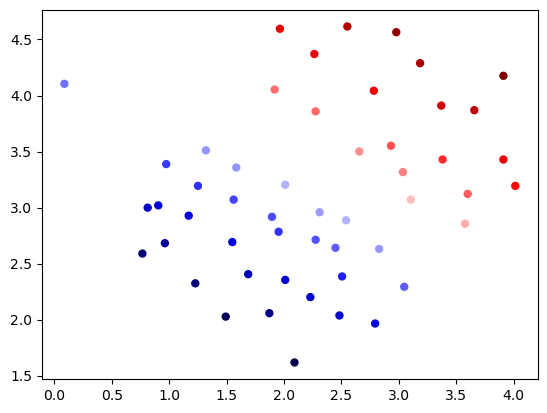

In [20]:
# Calculate the confidence level with the python function: svc.decision_function
# Plot the data, use a new scatterplot for that and orient yourself on the code in the method plot_raw_data
plt.scatter(data1['X1'], data1['X2'], s=25, marker='o', cmap='seismic', c = data1['SVM1 Confidence'])
plt.show()

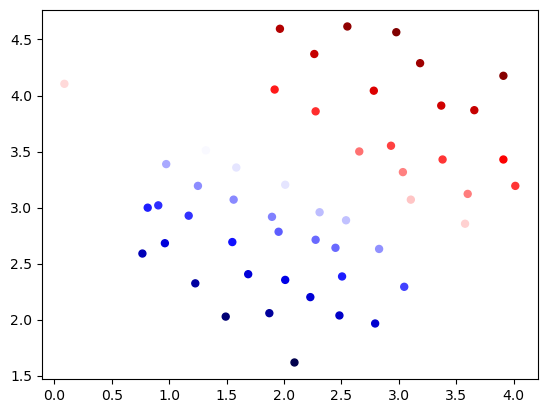

In [15]:
# Calculate the confidence level with the python function: svc.decision_function
data1['SVM100 Confidence'] = svc100.decision_function(X)
# Plot the data, use a new scatterplot for that and orient yourself on the code in the method plot_raw_data
plt.scatter(data1['X1'], data1['X2'], s=25, marker='o', cmap='seismic', c = data1['SVM100 Confidence'])
# plt.pcolormesh(X, y, -data1['SVM100 Confidence'], cmap=plt.cm.RdBu)
plt.show()

You will notice, that the SVM100 classifies the outlier correct. However, the confidence of some other points is lower (indicated by lighter colors).

### Non-linear decision boundary

Please load the second dataset and save it to the DataFrame ```data2```. Make sure the columns are named **X1**, **X2** and **y** in the DataFrame.

In [16]:
# Raw data
X1 = [0.107143, 0.093318, 0.0979263, 0.15553, 0.210829, 0.328341, 0.429724, 0.620968, 0.756912, 0.819124, 0.809908, 0.75, 0.773041, 0.770737, 0.766129, 0.779954, 0.75, 0.761521, 0.814516, 0.814516, 0.563364, 0.49424, 0.480415, 0.448157, 0.425115, 0.450461, 0.510369, 0.498848, 0.351382, 0.273041, 0.233871, 0.215438, 0.134793, 0.0748848, 0.0587558, 0.10023, 0.120968, 0.132488, 0.137097, 0.116359, 0.104839, 0.107143, 0.0910138, 0.0679724, 0.0679724, 0.093318, 0.162442, 0.178571, 0.144009, 0.109447, 0.146313, 0.148618, 0.160138, 0.123272, 0.104839, 0.0817972, 0.0587558, 0.0956221, 0.144009, 0.169355, 0.164747, 0.118664, 0.162442, 0.236175, 0.27765, 0.298387, 0.337558, 0.342166, 0.293779, 0.259217, 0.252304, 0.213134, 0.203917, 0.192396, 0.362903, 0.418203, 0.429724, 0.390553, 0.390553, 0.418203, 0.413594, 0.41129, 0.457373, 0.46659, 0.508065, 0.521889, 0.434332, 0.448157, 0.464286, 0.508065, 0.524194, 0.567972, 0.586406, 0.591014, 0.625576, 0.662442, 0.690092, 0.68318, 0.740783, 0.766129, 0.715438, 0.729263, 0.745392, 0.738479, 0.738479, 0.779954, 0.8053, 0.796083, 0.782258, 0.766129, 0.720046, 0.738479, 0.740783, 0.715438, 0.676267, 0.637097, 0.680876, 0.740783, 0.756912, 0.77765, 0.832949, 0.779954, 0.77765, 0.770737, 0.671659, 0.574885, 0.544931, 0.503456, 0.443548, 0.390553, 0.337558, 0.369816, 0.436636, 0.535714, 0.457373, 0.422811, 0.408986, 0.367512, 0.314516, 0.332949, 0.457373, 0.508065, 0.473502, 0.538018, 0.697005, 0.75, 0.800691, 0.823733, 0.710829, 0.701613, 0.637097, 0.593318, 0.563364, 0.540323, 0.510369, 0.501152, 0.480415, 0.432028, 0.404378, 0.365207, 0.314516, 0.27765, 0.263825, 0.236175, 0.22235, 0.1947, 0.171659, 0.176267, 0.18318, 0.160138, 0.111751, 0.0887097, 0.093318, 0.125576, 0.162442, 0.12788, 0.134793, 0.185484, 0.192396, 0.132488, 0.10023, 0.0748848, 0.0702765, 0.093318, 0.10023, 0.0656682, 0.0817972, 0.0979263, 0.821429, 0.858295, 0.814516, 0.789171, 0.791475, 0.37212, 0.351382, 0.3053, 0.323733, 0.289171, 0.27765, 0.293779, 0.298387, 0.31682, 0.353687, 0.353687, 0.3053, 0.291475, 0.261521, 0.268433, 0.270737, 0.247696, 0.259217, 0.261521, 0.233871, 0.229263, 0.266129, 0.302995, 0.293779, 0.268433, 0.282258, 0.312212, 0.349078, 0.351382, 0.379032, 0.420507, 0.379032, 0.346774, 0.337558, 0.346774, 0.360599, 0.319124, 0.328341, 0.335253, 0.307604, 0.3053, 0.319124, 0.335253, 0.360599, 0.388249, 0.404378, 0.413594, 0.374424, 0.365207, 0.367512, 0.369816, 0.346774, 0.332949, 0.332949, 0.358295, 0.353687, 0.367512, 0.395161, 0.385945, 0.43894, 0.422811, 0.450461, 0.464286, 0.471198, 0.461982, 0.436636, 0.406682, 0.374424, 0.358295, 0.367512, 0.406682, 0.422811, 0.485023, 0.480415, 0.508065, 0.514977, 0.526498, 0.558756, 0.574885, 0.593318, 0.641705, 0.678571, 0.703917, 0.726959, 0.738479, 0.779954, 0.789171, 0.784562, 0.784562, 0.75, 0.738479, 0.729263, 0.678571, 0.664747, 0.591014, 0.549539, 0.531106, 0.49424, 0.441244, 0.427419, 0.397465, 0.397465, 0.46659, 0.508065, 0.508065, 0.547235, 0.584101, 0.611751, 0.669355, 0.634793, 0.710829, 0.692396, 0.747696, 0.729263, 0.736175, 0.743088, 0.773041, 0.747696, 0.761521, 0.807604, 0.812212, 0.830645, 0.823733, 0.793779, 0.77765, 0.756912, 0.740783, 0.72235, 0.657834, 0.644009, 0.593318, 0.540323, 0.623272, 0.650922, 0.692396, 0.639401, 0.549539, 0.540323, 0.565668, 0.632488, 0.703917, 0.75, 0.8053, 0.837558, 0.867512, 0.904378, 0.952765, 0.975806, 0.968894, 0.927419, 0.881336, 0.851382, 0.807604, 0.800691, 0.860599, 0.908986, 0.920507, 0.955069, 0.96659, 0.968894, 0.897465, 0.851382, 0.851382, 0.855991, 0.828341, 0.60023, 0.60023, 0.482719, 0.254608, 0.226959, 0.160138, 0.176267, 0.111751, 0.0748848, 0.0541475, 0.0449309, 0.111751, 0.104839, 0.153226, 0.199309, 0.0610599, 0.0564516, 0.0748848, 0.093318, 0.353687, 0.309908, 0.270737, 0.300691, 0.392857, 0.404378, 0.420507, 0.445853, 0.464286, 0.374424, 0.425115, 0.369816, 0.480415, 0.429724, 0.554147, 0.620968, 0.616359, 0.662442, 0.68318, 0.692396, 0.720046, 0.726959, 0.680876, 0.65553, 0.620968, 0.591014, 0.567972, 0.567972, 0.565668, 0.62788, 0.563364, 0.618664, 0.607143, 0.58871, 0.577189, 0.584101, 0.611751, 0.623272, 0.623272, 0.597926, 0.554147, 0.544931, 0.544931, 0.570276, 0.595622, 0.597926, 0.630184, 0.657834, 0.703917, 0.706221, 0.701613, 0.664747, 0.644009, 0.644009, 0.644009, 0.637097, 0.634793, 0.58871, 0.551843, 0.56106, 0.577189, 0.551843, 0.547235, 0.547235, 0.593318, 0.669355, 0.673963, 0.662442, 0.662442, 0.641705, 0.664747, 0.579493, 0.544931, 0.547235, 0.604839, 0.650922, 0.388249, 0.369816, 0.312212, 0.312212, 0.273041, 0.3053, 0.312212, 0.254608, 0.289171, 0.273041, 0.296083, 0.34447, 0.367512, 0.392857, 0.388249, 0.406682, 0.390553, 0.402074, 0.358295, 0.339862, 0.351382, 0.3053, 0.240783, 0.282258, 0.487327, 0.519585, 0.586406, 0.634793, 0.648618, 0.664747, 0.699309, 0.752304, 0.784562, 0.802995, 0.830645, 0.609447, 0.611751, 0.574885, 0.544931, 0.558756, 0.58871, 0.595622, 0.602535, 0.570276, 0.563364, 0.577189, 0.60023, 0.618664, 0.646313, 0.637097, 0.648618, 0.650922, 0.660138, 0.660138, 0.669355, 0.634793, 0.602535, 0.604839, 0.616359, 0.657834, 0.680876, 0.697005, 0.708525, 0.736175, 0.164747, 0.150922, 0.141705, 0.134793, 0.12788, 0.0841014, 0.0679724, 0.123272, 0.0817972, 0.137097, 0.137097, 0.150922, 0.148618, 0.213134, 0.141705, 0.169355, 0.0771889, 0.0564516, 0.0864055, 0.0702765, 0.0633641, 0.0541475, 0.0518433, 0.0817972, 0.153226, 0.208525, 0.729263, 0.8053, 0.828341, 0.855991, 0.927419, 0.975806, 0.980415, 0.89977, 0.87212, 0.849078, 0.814516, 0.784562, 0.775346, 0.775346, 0.745392, 0.809908, 0.858295, 0.862903, 0.922811, 0.941244, 0.989631, 0.987327, 0.918203, 0.842166, 0.809908, 0.726959, 0.690092, 0.690092, 0.579493, 0.473502, 0.434332, 0.25, 0.224654, 0.180876, 0.118664, 0.164747, 0.171659, 0.15553, 0.132488, 0.125576, 0.178571, 0.22235, 0.229263, 0.201613, 0.173963, 0.141705, 0.137097, 0.0771889, 0.0748848, 0.132488, 0.192396, 0.0748848, 0.116359, 0.125576, 0.0910138, 0.150922, 0.203917, 0.266129, 0.321429, 0.50576, 0.482719, 0.508065, 0.485023, 0.478111, 0.478111, 0.459677, 0.459677, 0.478111, 0.459677, 0.461982, 0.473502, 0.475806, 0.448157, 0.496544, 0.514977, 0.478111, 0.475806, 0.436636, 0.468894, 0.383641, 0.353687, 0.369816, 0.355991, 0.34447, 0.349078, 0.381336, 0.381336, 0.379032, 0.385945, 0.415899, 0.413594, 0.404378, 0.41129, 0.404378, 0.395161, 0.397465, 0.408986, 0.789171, 0.807604, 0.8053, 0.784562, 0.782258, 0.830645, 0.839862, 0.823733, 0.839862, 0.839862, 0.832949, 0.842166, 0.860599, 0.812212, 0.798387, 0.802995, 0.775346, 0.736175, 0.782258, 0.782258, 0.759217, 0.745392, 0.740783, 0.733871, 0.699309, 0.697005, 0.692396, 0.676267, 0.657834, 0.657834, 0.644009, 0.648618, 0.618664, 0.558756, 0.554147, 0.591014, 0.609447, 0.620968, 0.62788, 0.644009, 0.662442, 0.680876, 0.632488, 0.58871, 0.581797, 0.570276, 0.558756, 0.554147, 0.514977, 0.510369, 0.517281, 0.554147, 0.554147, 0.540323, 0.528802, 0.503456, 0.491935, 0.517281, 0.526498, 0.540323, 0.517281, 0.496544, 0.489631, 0.473502, 0.487327, 0.508065, 0.514977, 0.450461, 0.475806, 0.473502, 0.457373, 0.450461, 0.487327, 0.53341, 0.538018, 0.528802, 0.512673, 0.185484, 0.208525, 0.190092, 0.187788, 0.190092, 0.197005, 0.1947, 0.176267, 0.146313, 0.132488, 0.157834, 0.164747, 0.118664, 0.12788, 0.160138, 0.173963, 0.157834, 0.18318, 0.206221, 0.215438, 0.226959, 0.116359, 0.116359, 0.137097, 0.10023, 0.213134, 0.261521, 0.252304, 0.710829, 0.662442, 0.6947, 0.715438, 0.37212, 0.374424, 0.415899, 0.226959, 0.247696, 0.273041, 0.291475, 0.22235, 0.224654, 0.203917, 0.185484, 0.206221, 0.245392, 0.22235, 0.226959, 0.259217, 0.224654, 0.203917, 0.199309, 0.233871, 0.256912, 0.254608, 0.266129, 0.243088, 0.233871, 0.240783, 0.273041, 0.289171, 0.302995, 0.319124, 0.337558, 0.362903, 0.374424, 0.604839, 0.570276, 0.563364, 0.623272, 0.664747, 0.664747, 0.687788, 0.717742, 0.738479, 0.740783, 0.710829, 0.685484, 0.68318, 0.687788, 0.687788, 0.669355, 0.65553, 0.639401, 0.639401, 0.584101, 0.563364, 0.547235, 0.567972, 0.581797, 0.595622, 0.625576, 0.648618, 0.637097, 0.641705, 0.667051, 0.706221, 0.961982, 0.927419, 0.927419, 0.948157, 0.961982, 0.957373, 0.915899, 0.915899, 0.922811, 0.925115, 0.936636, 0.968894, 0.998848, 0.959677, 0.955069, 0.941244, 0.918203, 0.91129, 0.913594, 0.906682, 0.879032, 0.874424, 0.927419, 0.948157, 0.961982, 0.96659, 0.96659, 0.948157, 0.934332, 0.948157, 0.964286, 0.989631, 0.987327, 0.96659, 0.959677, 0.904378, 0.915899, 0.922811, 0.91129, 0.890553, 0.874424, 0.897465, 0.913594, 0.968894, 0.985023, 0.99424, 0.964286, 0.975806, 0.989631, 0.996544] 
X2 = [0.60307, 0.649854, 0.705409, 0.784357, 0.866228, 0.929094, 0.934942, 0.934942, 0.910088, 0.879386, 0.836988, 0.819444, 0.854532, 0.88962, 0.899854, 0.835526, 0.791667, 0.765351, 0.832602, 0.885234, 0.921784, 0.899854, 0.863304, 0.819444, 0.857456, 0.899854, 0.937865, 0.945175, 0.934942, 0.901316, 0.861842, 0.858918, 0.861842, 0.872076, 0.872076, 0.83845, 0.83114, 0.813596, 0.774123, 0.749269, 0.727339, 0.699561, 0.65424, 0.633772, 0.623538, 0.585526, 0.579678, 0.59576, 0.642544, 0.645468, 0.703947, 0.741959, 0.777047, 0.791667, 0.815058, 0.82383, 0.88231, 0.894006, 0.88962, 0.864766, 0.844298, 0.839912, 0.883772, 0.899854, 0.936404, 0.955409, 0.961257, 0.958333, 0.93348, 0.924708, 0.942251, 0.921784, 0.891082, 0.880848, 0.961257, 0.964181, 0.967105, 0.942251, 0.936404, 0.923246, 0.901316, 0.888158, 0.864766, 0.848684, 0.907164, 0.927632, 0.93348, 0.958333, 0.972953, 0.956871, 0.934942, 0.927632, 0.955409, 0.958333, 0.952485, 0.949561, 0.936404, 0.923246, 0.91886, 0.914474, 0.892544, 0.88962, 0.875, 0.850146, 0.839912, 0.81652, 0.798977, 0.790205, 0.763889, 0.756579, 0.842836, 0.88962, 0.923246, 0.939327, 0.940789, 0.921784, 0.915936, 0.915936, 0.937865, 0.951023, 0.91886, 0.872076, 0.85307, 0.92617, 0.955409, 0.946637, 0.929094, 0.914474, 0.923246, 0.930556, 0.92617, 0.923246, 0.910088, 0.959795, 0.959795, 0.939327, 0.905702, 0.908626, 0.920322, 0.924708, 0.923246, 0.914474, 0.949561, 0.962719, 0.955409, 0.951023, 0.913012, 0.864766, 0.861842, 0.886696, 0.910088, 0.917398, 0.917398, 0.910088, 0.883772, 0.863304, 0.841374, 0.855994, 0.876462, 0.898392, 0.898392, 0.895468, 0.891082, 0.875, 0.86038, 0.850146, 0.834064, 0.819444, 0.787281, 0.753655, 0.747807, 0.739035, 0.701023, 0.68348, 0.65424, 0.630848, 0.58845, 0.58845, 0.625, 0.664474, 0.670322, 0.671784, 0.705409, 0.721491, 0.752193, 0.759503, 0.774123, 0.774123, 0.89693, 0.84576, 0.820906, 0.798977, 0.749269, 0.851608, 0.863304, 0.854532, 0.841374, 0.834064, 0.829678, 0.810673, 0.801901, 0.841374, 0.834064, 0.82383, 0.804825, 0.784357, 0.800439, 0.800439, 0.81652, 0.806287, 0.781433, 0.778509, 0.762427, 0.725877, 0.706871, 0.696637, 0.679094, 0.66155, 0.652778, 0.644006, 0.626462, 0.605994, 0.58114, 0.553363, 0.529971, 0.518275, 0.525585, 0.565058, 0.584064, 0.620614, 0.66886, 0.682018, 0.730263, 0.763889, 0.809211, 0.820906, 0.828216, 0.822368, 0.798977, 0.788743, 0.768275, 0.765351, 0.777047, 0.800439, 0.798977, 0.779971, 0.739035, 0.690789, 0.66155, 0.63962, 0.61769, 0.608918, 0.591374, 0.572368, 0.534357, 0.538743, 0.591374, 0.629386, 0.648392, 0.67617, 0.702485, 0.762427, 0.739035, 0.667398, 0.611842, 0.598684, 0.614766, 0.63231, 0.649854, 0.660088, 0.667398, 0.674708, 0.67617, 0.66155, 0.63962, 0.616228, 0.586988, 0.557749, 0.528509, 0.527047, 0.556287, 0.597222, 0.642544, 0.66155, 0.673246, 0.693713, 0.696637, 0.706871, 0.692251, 0.674708, 0.65424, 0.652778, 0.66886, 0.698099, 0.702485, 0.67617, 0.682018, 0.684942, 0.705409, 0.709795, 0.714181, 0.711257, 0.68348, 0.684942, 0.664474, 0.655702, 0.63231, 0.607456, 0.594298, 0.582602, 0.553363, 0.543129, 0.537281, 0.546053, 0.576754, 0.585526, 0.625, 0.641082, 0.652778, 0.671784, 0.686404, 0.686404, 0.686404, 0.674708, 0.899854, 0.895468, 0.891082, 0.88231, 0.877924, 0.886696, 0.892544, 0.908626, 0.915936, 0.907164, 0.875, 0.793129, 0.779971, 0.775585, 0.772661, 0.774123, 0.777047, 0.801901, 0.803363, 0.800439, 0.806287, 0.84576, 0.866228, 0.850146, 0.836988, 0.826754, 0.822368, 0.822368, 0.820906, 0.819444, 0.788743, 0.785819, 0.839912, 0.850146, 0.940789, 0.940789, 0.930556, 0.951023, 0.899854, 0.891082, 0.86038, 0.866228, 0.885234, 0.883772, 0.914474, 0.913012, 0.89693, 0.885234, 0.883772, 0.91155, 0.89693, 0.879386, 0.858918, 0.714181, 0.774123, 0.744883, 0.698099, 0.673246, 0.65424, 0.638158, 0.616228, 0.604532, 0.563596, 0.528509, 0.509503, 0.642544, 0.66886, 0.679094, 0.705409, 0.739035, 0.722953, 0.705409, 0.651316, 0.641082, 0.667398, 0.695175, 0.711257, 0.722953, 0.718567, 0.687865, 0.66155, 0.648392, 0.591374, 0.59576, 0.600146, 0.622076, 0.620614, 0.594298, 0.576754, 0.56652, 0.562135, 0.557749, 0.554825, 0.547515, 0.535819, 0.532895, 0.528509, 0.527047, 0.527047, 0.529971, 0.529971, 0.527047, 0.516813, 0.510965, 0.535819, 0.563596, 0.575292, 0.58845, 0.607456, 0.616228, 0.619152, 0.607456, 0.594298, 0.541667, 0.522661, 0.510965, 0.508041, 0.516813, 0.522661, 0.524123, 0.56652, 0.56652, 0.535819, 0.516813, 0.562135, 0.570906, 0.578216, 0.59576, 0.59576, 0.645468, 0.693713, 0.706871, 0.728801, 0.712719, 0.740497, 0.753655, 0.756579, 0.741959, 0.717105, 0.687865, 0.665936, 0.651316, 0.652778, 0.608918, 0.591374, 0.563596, 0.541667, 0.543129, 0.611842, 0.689327, 0.733187, 0.749269, 0.765351, 0.667398, 0.677632, 0.686404, 0.712719, 0.728801, 0.730263, 0.701023, 0.633772, 0.551901, 0.538743, 0.532895, 0.81652, 0.785819, 0.756579, 0.727339, 0.718567, 0.722953, 0.733187, 0.752193, 0.765351, 0.777047, 0.796053, 0.813596, 0.825292, 0.796053, 0.765351, 0.739035, 0.743421, 0.741959, 0.740497, 0.752193, 0.782895, 0.775585, 0.771199, 0.755117, 0.747807, 0.740497, 0.705409, 0.674708, 0.644006, 0.812135, 0.847222, 0.81652, 0.84576, 0.877924, 0.86038, 0.826754, 0.790205, 0.801901, 0.760965, 0.712719, 0.749269, 0.673246, 0.629386, 0.59576, 0.626462, 0.623538, 0.684942, 0.740497, 0.765351, 0.820906, 0.762427, 0.695175, 0.648392, 0.594298, 0.582602, 0.692251, 0.692251, 0.692251, 0.689327, 0.674708, 0.648392, 0.636696, 0.629386, 0.620614, 0.644006, 0.65424, 0.673246, 0.684942, 0.686404, 0.692251, 0.671784, 0.679094, 0.66155, 0.657164, 0.638158, 0.638158, 0.64693, 0.679094, 0.673246, 0.658626, 0.702485, 0.703947, 0.725877, 0.737573, 0.689327, 0.674708, 0.687865, 0.722953, 0.693713, 0.572368, 0.546053, 0.529971, 0.491959, 0.548684, 0.587573, 0.575292, 0.542544, 0.567105, 0.622368, 0.620322, 0.536404, 0.509795, 0.577339, 0.59576, 0.569152, 0.540497, 0.548684, 0.544591, 0.679678, 0.769737, 0.861842, 0.927339, 0.93348, 0.93962, 0.851754, 0.818421, 0.813158, 0.795614, 0.772807, 0.746491, 0.746491, 0.762281, 0.786842, 0.80614, 0.832456, 0.874561, 0.911404, 0.900877, 0.857018, 0.818421, 0.772807, 0.730702, 0.753509, 0.764035, 0.485088, 0.471053, 0.451754, 0.435965, 0.42193, 0.411404, 0.428947, 0.455263, 0.492105, 0.514912, 0.535965, 0.516667, 0.500877, 0.474561, 0.45, 0.434211, 0.423684, 0.416667, 0.523684, 0.488596, 0.47807, 0.441228, 0.425439, 0.42193, 0.441228, 0.465789, 0.499123, 0.52193, 0.553509, 0.574561, 0.586842, 0.511404, 0.502632, 0.476316, 0.428947, 0.416667, 0.469298, 0.460526, 0.45, 0.451754, 0.446491, 0.439474, 0.448246, 0.465789, 0.465789, 0.464035, 0.458772, 0.458772, 0.455263, 0.437719, 0.423684, 0.414912, 0.416667, 0.441228, 0.448246, 0.471053, 0.47807, 0.47807, 0.474561, 0.474561, 0.474561, 0.451754, 0.432456, 0.411404, 0.40614, 0.499123, 0.516667, 0.504386, 0.495614, 0.490351, 0.476316, 0.472807, 0.486842, 0.485088, 0.465789, 0.462281, 0.458772, 0.439474, 0.435965, 0.42193, 0.418421, 0.416667, 0.448246, 0.45, 0.488596, 0.455263, 0.435965, 0.420175, 0.411404, 0.409649, 0.458772, 0.535965, 0.572807, 0.535965, 0.499123, 0.511404, 0.527193, 0.520175, 0.497368, 0.479825, 0.45, 0.427193, 0.407895, 0.402632, 0.441228, 0.464035, 0.464035, 0.488596, 0.509649, 0.467544, 0.432456, 0.425439, 0.420175, 0.479825, 0.516667, 0.532456, 0.525439, 0.485088, 0.455263, 0.444737, 0.483333, 0.535965, 0.553509, 0.981579, 0.969298, 0.986842, 0.958772, 0.988596, 0.967544, 0.971053, 0.792105, 0.834211, 0.858772, 0.862281, 0.813158, 0.797368, 0.774561, 0.755263, 0.728947, 0.723684, 0.70614, 0.695614, 0.681579, 0.660526, 0.648246, 0.655263, 0.697368, 0.727193, 0.665789, 0.641228, 0.635965, 0.618421, 0.613158, 0.625439, 0.625439, 0.614912, 0.600877, 0.585088, 0.548246, 0.528947, 0.844737, 0.816667, 0.804386, 0.814912, 0.804386, 0.783333, 0.748246, 0.716667, 0.702632, 0.735965, 0.737719, 0.765789, 0.776316, 0.802632, 0.820175, 0.837719, 0.844737, 0.818421, 0.839474, 0.839474, 0.797368, 0.772807, 0.842982, 0.869298, 0.871053, 0.869298, 0.857018, 0.839474, 0.804386, 0.857018, 0.82193, 0.579825, 0.592105, 0.572807, 0.569298, 0.55, 0.557018, 0.557018, 0.557018, 0.528947, 0.514912, 0.499123, 0.490351, 0.514912, 0.542982, 0.528947, 0.500877, 0.486842, 0.481579, 0.465789, 0.442982, 0.42193, 0.407895, 0.407895, 0.411404, 0.413158, 0.425439, 0.434211, 0.434211, 0.435965, 0.469298, 0.474561, 0.453509, 0.435965, 0.516667, 0.557018, 0.560526, 0.525439, 0.49386, 0.453509, 0.444737, 0.507895, 0.527193, 0.537719, 0.565789, 0.579825, 0.516667, 0.472807, 0.439474, 0.425439, 0.414912]
y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [17]:
# Aggregate the datasets into a DataFrame called data2
# Get X1, X2 and y into a DataFrame'
data_dict = {'X1': X1, 'X2': X2, 'y': y}
data2 = pd.DataFrame(data_dict)
data2 

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


Please assign all successful samples to the variable ```successful``` and the others to ```complications```.

In [18]:
successful = data2.loc[data2['y'] == 0]
complications = data2.loc[data2['y'] == 1]
complications

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


Let's visualize the data as a scatter plot. Therefore use the already implemented method of ```plot_raw_data```. When calling the method, hand it over the two parameters successful and complications.

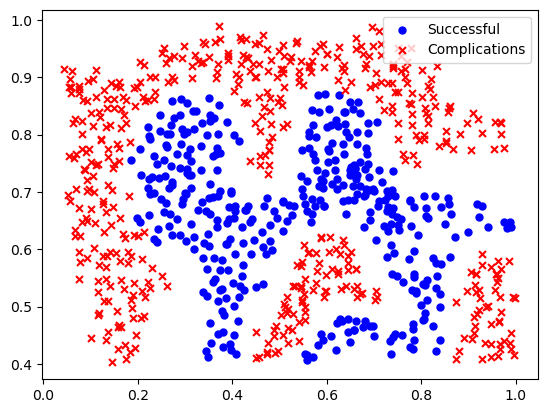

In [19]:
plot_raw_data(successful, complications)

You will notice that the relation between the features and the outcome of the surgery is more complicated now. A linear decision boundary will not be successful for this dataset.

Now please define a SVM with the built-in RBF kernel using the following hyperparameters: 
- The regularization parameter C: 100
- Coefficient for the kernel gamma: 10
- Set the probability parameter to True

You can find helpful information on how to use the classifier in Python here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [20]:
# Define the model
svm_rbf = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)

Now, train the SVM on the ```data2``` and evaluate it.

In [21]:
X = data2[['X1','X2']]
y = data2['y']

In [22]:
# Fit the model to the data points
svm_rbf.fit(X,y)
# Evaluate the model with the score function
svm_rbf.score(X,y)

0.9698725376593279


Now, please visualize the data in a scatter plot. Please shade the points based on the predicted probability that the instance has a negative class label ("Complications").

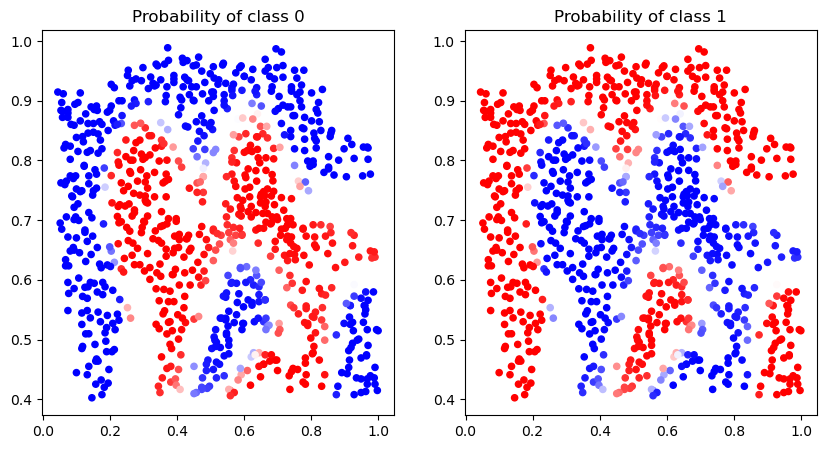

In [24]:
# Compute the probabilites of possible outcomes for the samples in X using svc.predict_proba()
proba = svm_rbf.predict_proba(X)

# Use the calculated probability in the beneath scatter plot function ax.scatter() as the parameter c. 
# Choose s to be 30 and the cmap should be set to 'Blues'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].scatter(data2['X1'], data2['X2'], c=proba[:,0], s=20, cmap='bwr')
ax[0].set_title('Probability of class 0')
ax[1].scatter(data2['X1'], data2['X2'], c=proba[:,1], s=20, cmap='bwr')
ax[1].set_title('Probability of class 1')

plt.show()

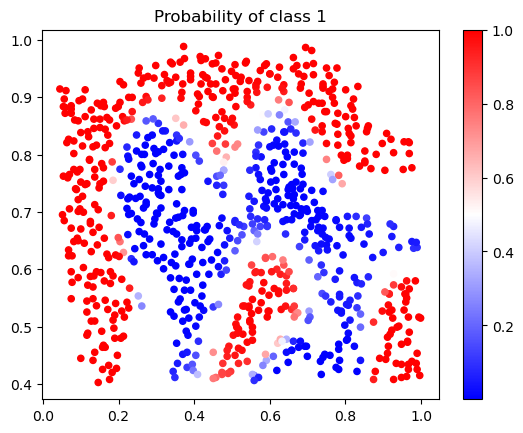

In [25]:
plt.scatter(data2['X1'], data2['X2'], c=proba[:,1], s=20, cmap='bwr')
plt.title("Probability of class 1")
plt.colorbar()
plt.show()